In [2]:
#Import required packages 

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


In [3]:
#load dataset

In [4]:
a_dataset = pd.read_csv("train_data.csv")

In [5]:
#Print dataset information

In [6]:
a_dataset['TypeOfAdmission'].unique()

array(['Newborn', 'Emergency', 'Elective', 'Urgent'], dtype=object)

# EDA
## Excluding columns
Look at the data below and the provided text file outlining the data value for each column
The first two columns ID, HealthServiceArea provide no real use in our dataframe. 
## Onehot encoding 
Looking at the various columns, there are various categorical values such as Gender, Race, TypeOfAdmission, CCSProcedureCode,APRSeverityOfIllnessCode, PaymentTypology and EmergencyDepartmentIndicator.

Looking at these columns further I believe that all are able to one hot encoded except APRSeverityOfIllness Code as these can be considered ordinal from 1 (Minor) to 4 (Extreme)

In [7]:
print(a_dataset)

          ID HealthServiceArea Gender                    Race TypeOfAdmission  \
0          1     New York City      F              Other Race         Newborn   
1          2     New York City      M  Black/African American         Newborn   
2          3     New York City      M              Other Race         Newborn   
3          4     New York City      F              Other Race         Newborn   
4          5     New York City      F              Other Race         Newborn   
...      ...               ...    ...                     ...             ...   
59961  59962        Western NY      M  Black/African American         Newborn   
59962  59963        Western NY      M                   White         Newborn   
59963  59964        Western NY      M                   White         Newborn   
59964  59965        Western NY      M                   White         Newborn   
59965  59966        Western NY      F                   White         Newborn   

       CCSProcedureCode  AP

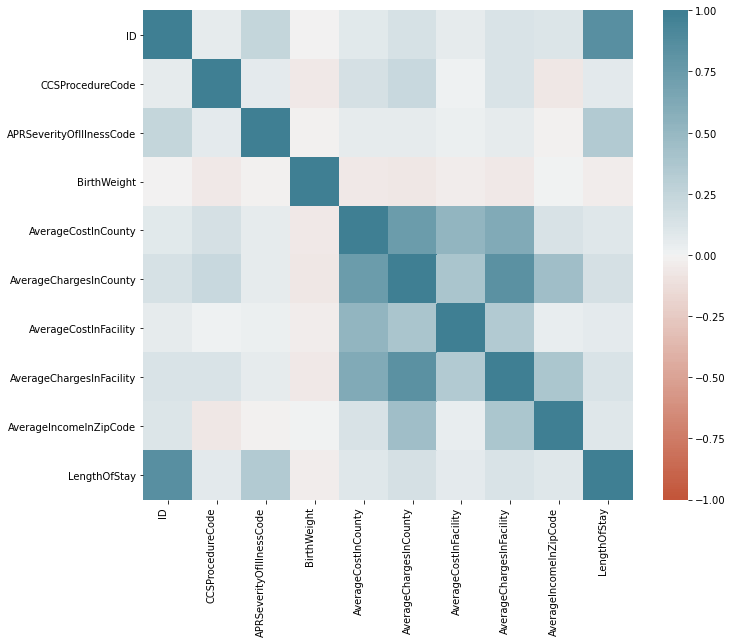

In [8]:
f, ax = plt.subplots(figsize=(11, 9))
corr = a_dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [9]:
a_dataset['PaymentTypology'].unique()

array(['Medicaid', 'Private Health Insurance', 'Blue Cross/Blue Shield',
       'Self-Pay', 'Managed Care, Unspecified', 'Miscellaneous/Other',
       'Federal/State/Local/VA', 'Medicare', 'Unknown'], dtype=object)

In [10]:
# Remove ID 

In [11]:
a_dataset = a_dataset.drop(columns = ['ID'])

In [12]:
a_dataset = a_dataset.drop(columns = ['HealthServiceArea'])

In [13]:
print(a_dataset)

      Gender                    Race TypeOfAdmission  CCSProcedureCode  \
0          F              Other Race         Newborn               228   
1          M  Black/African American         Newborn               228   
2          M              Other Race         Newborn               220   
3          F              Other Race         Newborn                 0   
4          F              Other Race         Newborn               228   
...      ...                     ...             ...               ...   
59961      M  Black/African American         Newborn               115   
59962      M                   White         Newborn               115   
59963      M                   White         Newborn               115   
59964      M                   White         Newborn                -1   
59965      F                   White         Newborn               231   

       APRSeverityOfIllnessCode           PaymentTypology  BirthWeight  \
0                             1      

In [14]:
# One-hot encoding, specifically Gender(M, F, U), Race(Black/African American, Multi, Other Race, Unkown, White, Other Race),  TypeOfAdmission(Elective, Emergency, Newborn, Not Available, Trauma, Urgent)
# APRSeverityOfIllnessCode(Minor (1), Moderate (2),   Major (3), Extreme (4)), 
#PaymentTypology('Medicaid', 'Blue Cross/Blue Shield', 'Private Health Insurance', 'Medicare', 'Managed Care, Unspecified', 'Self-Pay', 'Unknown', 'Federal/State/Local/VA', 'Miscellaneous/Other','Department of Corrections')
#EmergencyDepartmentIndicator(Y, N) 

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
OneHotEncoder_Gender = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_Gender.fit(a_dataset[['Gender']])

onehot_ = OneHotEncoder_Gender.transform(a_dataset[['Gender']]).toarray()

print(onehot_)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [17]:
print(onehot_.shape, OneHotEncoder_Gender.categories_)

(59966, 3) [array(['F', 'M', 'U'], dtype=object)]


In [18]:
# Begin One hot encoding for 'Gender'

In [19]:
colname = 'Gender'
for i in range(len(OneHotEncoder_Gender.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_Gender.categories_[0][i])] = onehot_[:,i]
    


In [20]:
a_dataset.shape

(59966, 17)

In [21]:
a_dataset = a_dataset.drop(columns = ['Gender'])

In [22]:
a_dataset.shape

(59966, 16)

In [23]:
a_dataset['TypeOfAdmission'].unique()

array(['Newborn', 'Emergency', 'Elective', 'Urgent'], dtype=object)

In [24]:
## Do every other categorical column

In [25]:
OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_TypeOfAdmission.fit(a_dataset[['TypeOfAdmission']])

onehot_ = OneHotEncoder_TypeOfAdmission.transform(a_dataset[['TypeOfAdmission']]).toarray()

colname = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_[:,i]
    

In [26]:
print(onehot_.shape, OneHotEncoder_TypeOfAdmission.categories_)


(59966, 4) [array(['Elective', 'Emergency', 'Newborn', 'Urgent'], dtype=object)]


In [27]:
a_dataset = a_dataset.drop(columns = ['TypeOfAdmission'])

In [28]:
OneHotEncoder_Race = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_Race.fit(a_dataset[['Race']])

onehot_ = OneHotEncoder_Race.transform(a_dataset[['Race']]).toarray()

colname = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_[:,i]
    


In [29]:
a_dataset["CCSProcedureCode"].unique()

array([228, 220,   0, 231, 115,  -1, 216])

In [30]:
a_dataset = a_dataset.drop(columns = ['Race'])

In [31]:
OneHotEncoder_CCSProcedureCode = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_CCSProcedureCode.fit(a_dataset[['CCSProcedureCode']])

onehot_ = OneHotEncoder_CCSProcedureCode.transform(a_dataset[['CCSProcedureCode']]).toarray()

colname = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_[:,i]

a_dataset = a_dataset.drop(columns = ['CCSProcedureCode'])

In [32]:
a_dataset

,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,...,Race_Multi-racial,Race_Other Race,Race_White,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231
0,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59961,1,Blue Cross/Blue Shield,3600,N,1826,4190,1551,3715,36,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59962,2,Blue Cross/Blue Shield,3300,N,1826,4190,1551,3715,55,6,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59963,2,Blue Cross/Blue Shield,3400,N,1826,4190,1551,3715,55,4,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59964,2,Medicaid,3100,N,1826,4190,1551,3715,55,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
OneHotEncoder_EmergencyDepartmentIndicator = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_EmergencyDepartmentIndicator.fit(a_dataset[['EmergencyDepartmentIndicator']])

onehot_ = OneHotEncoder_EmergencyDepartmentIndicator.transform(a_dataset[['EmergencyDepartmentIndicator']]).toarray()

colname = 'EmergencyDepartmentIndicator'
for i in range(len(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0][i])] = onehot_[:,i]

a_dataset = a_dataset.drop(columns = ['EmergencyDepartmentIndicator'])

In [34]:
OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_PaymentTypology.fit(a_dataset[['PaymentTypology']])

onehot_ = OneHotEncoder_PaymentTypology.transform(a_dataset[['PaymentTypology']]).toarray()

colname = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_[:,i]

a_dataset = a_dataset.drop(columns = ['PaymentTypology'])

In [35]:
a_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   APRSeverityOfIllnessCode                   59966 non-null  int64  
 1   BirthWeight                                59966 non-null  int64  
 2   AverageCostInCounty                        59966 non-null  int64  
 3   AverageChargesInCounty                     59966 non-null  int64  
 4   AverageCostInFacility                      59966 non-null  int64  
 5   AverageChargesInFacility                   59966 non-null  int64  
 6   AverageIncomeInZipCode                     59966 non-null  int64  
 7   LengthOfStay                               59966 non-null  int64  
 8   Gender_F                                   59966 non-null  float64
 9   Gender_M                                   59966 non-null  float64
 10  Gender_U              

## We will then proceed with Minmax scaling 

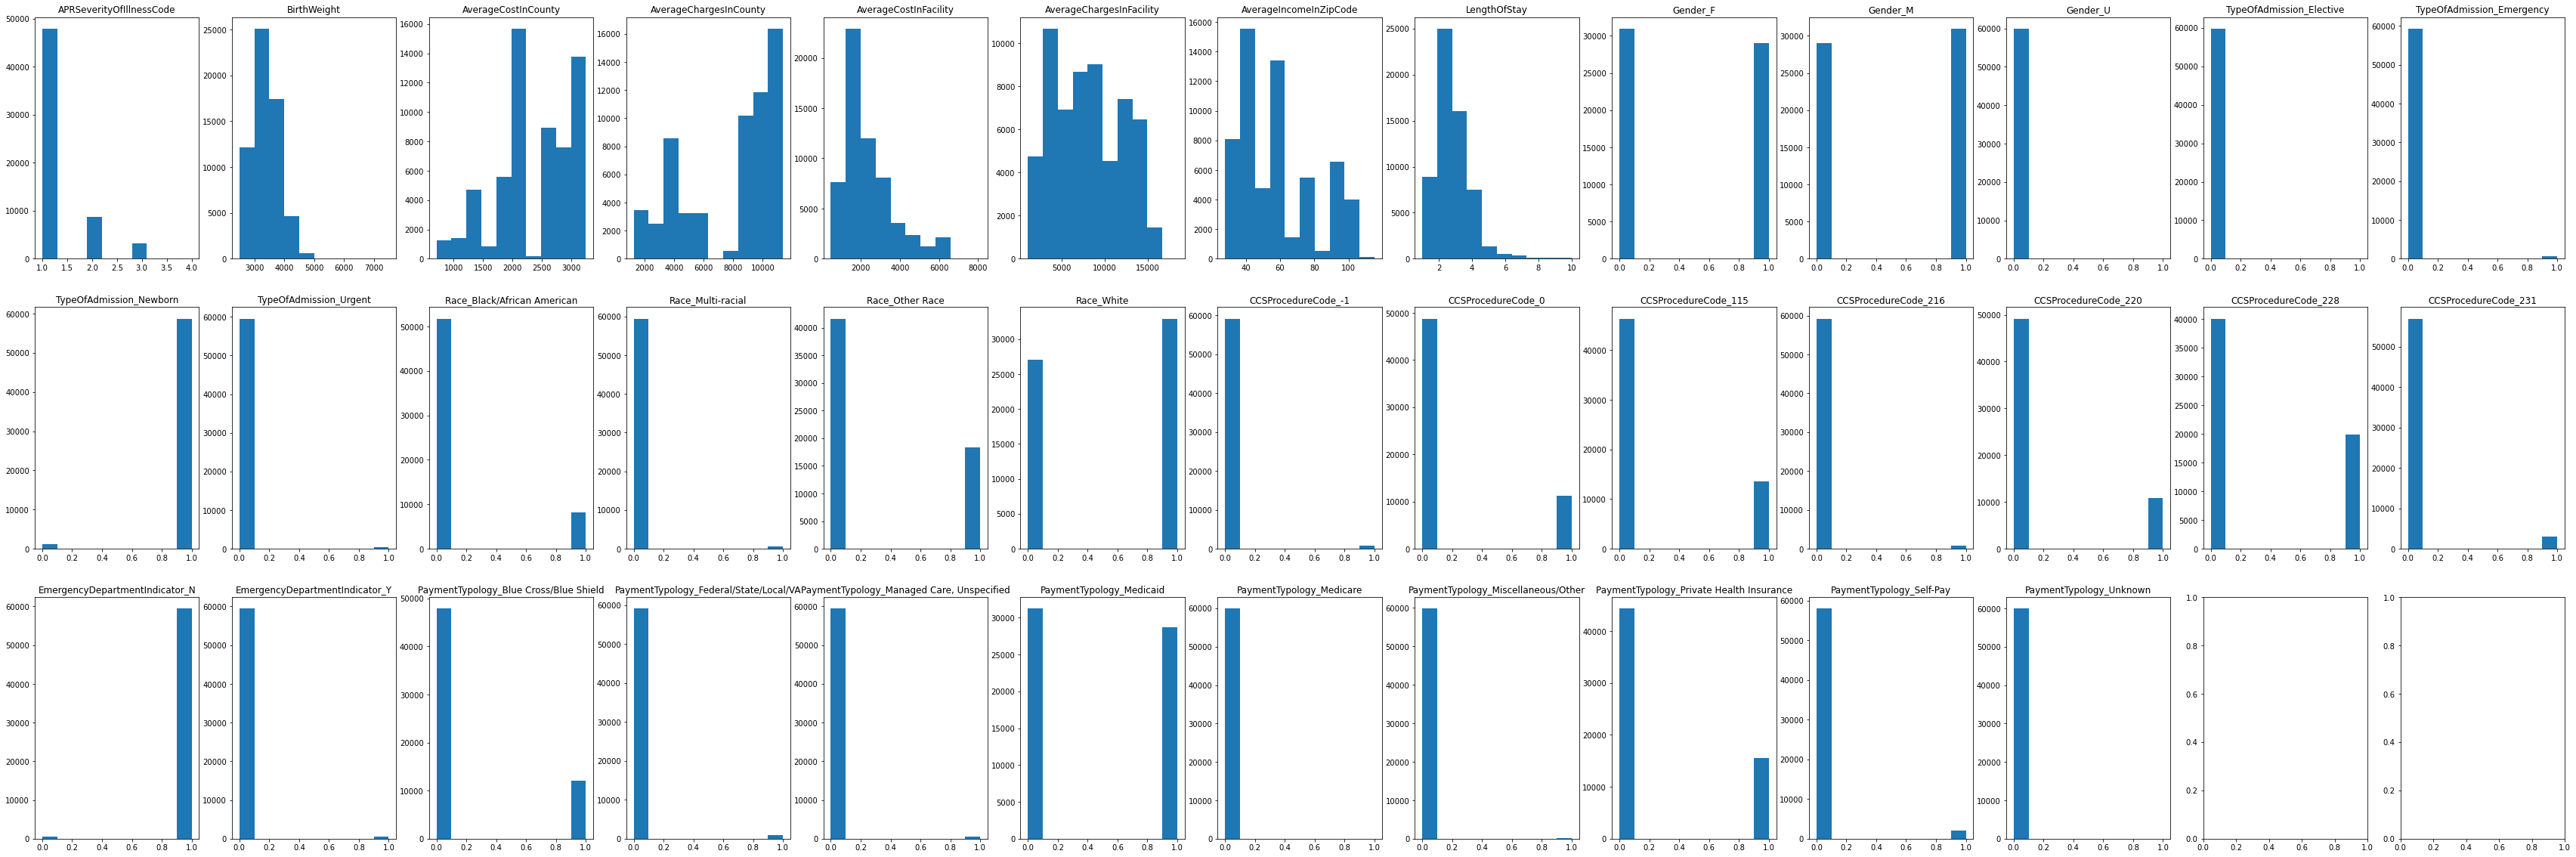

In [36]:
i = 0
j = 0
num_col = len(a_dataset.columns)

fig, axs = plt.subplots(3, 13,figsize=(60,20))
num_bins = 10


for col in a_dataset.columns:
    axs[j][i].hist(a_dataset[col], num_bins)
    axs[j][i].title.set_text(col)
       
    i +=1
    if i == 13:
        
        j += 1
        i = 0
    
plt.show()

<h3>We will now perform Feature scaling on the 7 non-categorical columns</h3>

Text(0.5, 1.0, 'After Standard Scaling')

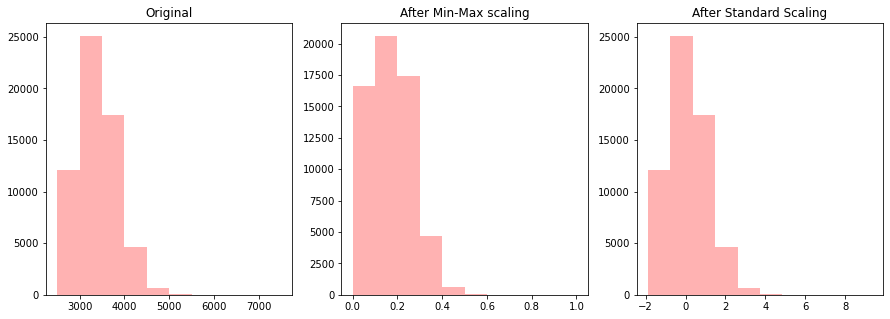

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

MinMaxScaler_RM = MinMaxScaler().fit(a_dataset[['BirthWeight']])
RM_minmax = MinMaxScaler_RM.transform(a_dataset[['BirthWeight']])

StandardScaler_RM = StandardScaler().fit(a_dataset[['BirthWeight']])
RM_standard = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(a_dataset[['BirthWeight']], alpha=0.3, color='r')
plt.title("Original")

plt.subplot(1,3,2)
plt.hist(RM_minmax, alpha=0.3, color='r')
plt.title("After Min-Max scaling")

plt.subplot(1,3,3)
plt.hist(RM_standard, alpha=0.3, color='r')
plt.title("After Standard Scaling")



## As standard scaling is more similar to the original, we will use this transoformation

In [38]:
a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])

In [ ]:
a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])